In [13]:
# !python -m spacy info

In [14]:
# !python -m spacy download en_core_web_sm

In [1]:
import spacy
import numpy as np 
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
from sentence_transformers import SentenceTransformer
import torch
from transformers import RobertaTokenizer, RobertaModel

def get_word2vec_embedding(phrase, vector_size=100):
    tokens = phrase.split()
    model = Word2Vec([tokens], vector_size=vector_size, min_count=1)
    embeddings = [model.wv[word] for word in tokens]
    return np.array(embeddings)

def get_glove_embedding(phrase, vector_size=100):

    glove_path = f'D:\glove.6B.{vector_size}d.txt'
    glove_model = KeyedVectors.load_word2vec_format(glove_path, binary=False, no_header=True)
    tokens = phrase.split()
    embeddings = [glove_model[word] for word in tokens if word in glove_model]
    return np.array(embeddings)

def get_sentence_transformer_embedding(phrase, model_name='all-MiniLM-L6-v2', vector_size=None):
    model = SentenceTransformer(model_name)
    embedding = model.encode(phrase)
    if vector_size and vector_size < len(embedding):
        embedding = embedding[:vector_size]
    elif vector_size and vector_size > len(embedding):
        embedding = np.pad(embedding, (0, vector_size - len(embedding)), 'constant')
    return embedding

def get_roberta_embedding(phrase, vector_size=None):
    tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    model = RobertaModel.from_pretrained('roberta-base')
    inputs = tokenizer(phrase, return_tensors="pt")
    outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy().flatten()
    if vector_size and vector_size < len(embedding):
        embedding = embedding[:vector_size]
    elif vector_size and vector_size > len(embedding):
        embedding = np.pad(embedding, (0, vector_size - len(embedding)), 'constant')
    return embedding



tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

d:\Apziva\Project3\nlp_env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\samar\.cache\huggingface\hub\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
job_title_keywords = [
    "aspiring human resources",
    "human resources professional",
    "full-stack software engineer",
    "engineering manager",
    "data scientist",
    "data analyst",
    "machine learning engineer",
    "product manager",
    "devops engineer",
    "frontend developer",
    "backend developer",
    "cloud architect",
    "business analyst",
    "UX designer",
    "AI researcher"
]

In [ ]:
selected_keyword = job_title_keywords[1]  # "full-stack software engineer"

roberta_keyword_emb = get_roberta_embedding(selected_keyword, vector_size=10)
sentence_keyword_emb = get_sentence_transformer_embedding(selected_keyword, vector_size=10)
word2vec_keyword_emb = get_word2vec_embedding(selected_keyword, vector_size=10)
glove_keyword_emb = get_glove_embedding(selected_keyword, vector_size=10)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


%pip install openai

In [14]:
import openai

# Initialize OpenAI client
client = openai.OpenAI(api_key="sk-proj-rCY9AX7_FXZkiwZ57f9rrkLGdZQ1AZcvMLjRRCx7g2GsTcHLo8Z-" \
"jpgGxUvT28IPHJpVLsnc3aT3BlbkFJYai_rfEHVOQG_h3jlp-HUUgfBWnGqbsYRjB5-O783bSYdK-ZJIvfuGqM6ngepsg5ceXhWZb_cA")
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


def get_embedding(text, model="text-embedding-3-small"):
    """
    Generate embedding for a given text using OpenAI's embedding model
    """
    try:
        response = client.embeddings.create(
            input=text,
            model=model
        )
        return response.data[0].embedding
    except Exception as e:
        print(f"Error generating embedding: {e}")
        return None

def calculate_similarity(embedding1, embedding2):
    """
    Calculate cosine similarity between two embeddings
    """
    return cosine_similarity([embedding1], [embedding2])[0][0]

# Example phrases to embed
phrases = [
    "Machine learning is transforming modern technology",
    "Artificial intelligence revolutionizes today's tech industry", 
    "I love eating pizza on weekends",
    "Deep learning models require large datasets",
    "The weather is sunny today"
]

print("Creating embeddings for sample phrases...\n")

# Generate embeddings for all phrases
embeddings = {}
for phrase in phrases:
    embedding = get_embedding(phrase)
    if embedding:
        embeddings[phrase] = embedding
        print(f"✓ Generated embedding for: '{phrase}'")
        print(f"  Embedding dimensions: {len(embedding)}")
        print(f"  First 5 values: {embedding[:5]}")
        print(f"  Embedding norm: {np.linalg.norm(embedding):.4f}")
        print()

# Compare semantic similarity between phrases
print("Semantic Similarity Analysis:")
print("-" * 50)

# Compare AI/ML related phrases
if len(embeddings) >= 2:
    phrase1 = phrases[0]  # "Machine learning is transforming modern technology"
    phrase2 = phrases[1]  # "Artificial intelligence revolutionizes today's tech industry"
    phrase3 = phrases[2]  # "I love eating pizza on weekends"
    
    sim_ai_ml = calculate_similarity(embeddings[phrase1], embeddings[phrase2])
    sim_ai_food = calculate_similarity(embeddings[phrase1], embeddings[phrase3])
    
    print(f"Similarity between AI/ML phrases: {sim_ai_ml:.4f}")
    print(f"Similarity between AI and food phrases: {sim_ai_food:.4f}")
    print()
    
    if sim_ai_ml > sim_ai_food:
        print("✓ The model correctly identifies higher similarity between related topics!")
    else:
        print("⚠ Unexpected similarity scores")

# Example with custom dimensions (reducing vector size)
print("Example with custom dimensions:")
print("-" * 30)

def get_embedding_custom_dims(text, dimensions=512):
    """
    Generate embedding with custom dimensions
    """
    try:
        response = client.embeddings.create(
            input=text,
            model="text-embedding-3-small",
            dimensions=dimensions  # Reduce from default 1536 to 512
        )
        return response.data[0].embedding
    except Exception as e:
        print(f"Error generating custom embedding: {e}")
        return None

sample_phrase = "Natural language processing enables computers to understand human language"
custom_embedding = get_embedding_custom_dims(sample_phrase, dimensions=512)

if custom_embedding:
    print(f"Original phrase: '{sample_phrase}'")
    print(f"Custom embedding dimensions: {len(custom_embedding)}")
    print(f"Storage reduction: {((1536 - 512) / 1536) * 100:.1f}%")

# Practical use case: Document search
print("\nPractical Use Case: Document Search")
print("-" * 40)

documents = [
    "Python is a versatile programming language used for web development",
    "JavaScript enables interactive web applications and user interfaces", 
    "Machine learning algorithms can predict customer behavior patterns",
    "Database optimization improves application performance significantly",
    "Cloud computing provides scalable infrastructure for modern applications"
]

query = "programming languages for web development"

print(f"Search query: '{query}'")
query_embedding = get_embedding(query)

if query_embedding:
    print("\nDocument relevance scores:")
    doc_similarities = []
    
    for i, doc in enumerate(documents):
        doc_embedding = get_embedding(doc)
        if doc_embedding:
            similarity = calculate_similarity(query_embedding, doc_embedding)
            doc_similarities.append((similarity, doc))
            print(f"{i+1}. {similarity:.4f} - {doc}")
    
    # Sort by relevance
    doc_similarities.sort(reverse=True)
    print(f"\nMost relevant document: {doc_similarities[0][1]}")

def get_embedding(text, model="text-embedding-3-small"):
    """
    Generate embedding for a given text using OpenAI's embedding model
    """
    try:
        response = client.embeddings.create(
            input=text,
            model=model
        )
        return response.data[0].embedding
    except Exception as e:
        print(f"Error generating embedding: {e}")
        return None

def calculate_similarity(embedding1, embedding2):
    """
    Calculate cosine similarity between two embeddings
    """
    return cosine_similarity([embedding1], [embedding2])[0][0]

# Example phrases to embed
phrases = [
    "Machine learning is transforming modern technology",
    "Artificial intelligence revolutionizes today's tech industry", 
    "I love eating pizza on weekends",
    "Deep learning models require large datasets",
    "The weather is sunny today"
]

print("Creating embeddings for sample phrases...\n")

# Generate embeddings for all phrases
embeddings = {}
for phrase in phrases:
    embedding = get_embedding(phrase)
    if embedding:
        embeddings[phrase] = embedding
        print(f"✓ Generated embedding for: '{phrase}'")
        print(f"  Embedding dimensions: {len(embedding)}")
        print(f"  First 5 values: {embedding[:5]}")
        print(f"  Embedding norm: {np.linalg.norm(embedding):.4f}")
        print()

# Compare semantic similarity between phrases
print("Semantic Similarity Analysis:")
print("-" * 50)

# Compare AI/ML related phrases
if len(embeddings) >= 2:
    phrase1 = phrases[0]  # "Machine learning is transforming modern technology"
    phrase2 = phrases[1]  # "Artificial intelligence revolutionizes today's tech industry"
    phrase3 = phrases[2]  # "I love eating pizza on weekends"
    
    sim_ai_ml = calculate_similarity(embeddings[phrase1], embeddings[phrase2])
    sim_ai_food = calculate_similarity(embeddings[phrase1], embeddings[phrase3])
    
    print(f"Similarity between AI/ML phrases: {sim_ai_ml:.4f}")
    print(f"Similarity between AI and food phrases: {sim_ai_food:.4f}")
    print()
    
    if sim_ai_ml > sim_ai_food:
        print("✓ The model correctly identifies higher similarity between related topics!")
    else:
        print("⚠ Unexpected similarity scores")

# Example with custom dimensions (reducing vector size)
print("Example with custom dimensions:")
print("-" * 30)

def get_embedding_custom_dims(text, dimensions=512):
    """
    Generate embedding with custom dimensions
    """
    try:
        response = client.embeddings.create(
            input=text,
            model="text-embedding-3-small",
            dimensions=dimensions  # Reduce from default 1536 to 512
        )
        return response.data[0].embedding
    except Exception as e:
        print(f"Error generating custom embedding: {e}")
        return None

sample_phrase = "Natural language processing enables computers to understand human language"
custom_embedding = get_embedding_custom_dims(sample_phrase, dimensions=512)

if custom_embedding:
    print(f"Original phrase: '{sample_phrase}'")
    print(f"Custom embedding dimensions: {len(custom_embedding)}")
    print(f"Storage reduction: {((1536 - 512) / 1536) * 100:.1f}%")

# Practical use case: Document search
print("\nPractical Use Case: Document Search")
print("-" * 40)

documents = [
    "Python is a versatile programming language used for web development",
    "JavaScript enables interactive web applications and user interfaces", 
    "Machine learning algorithms can predict customer behavior patterns",
    "Database optimization improves application performance significantly",
    "Cloud computing provides scalable infrastructure for modern applications"
]

query = "programming languages for web development"

print(f"Search query: '{query}'")
query_embedding = get_embedding(query)

if query_embedding:
    print("\nDocument relevance scores:")
    doc_similarities = []
    
    for i, doc in enumerate(documents):
        doc_embedding = get_embedding(doc)
        if doc_embedding:
            similarity = calculate_similarity(query_embedding, doc_embedding)
            doc_similarities.append((similarity, doc))
            print(f"{i+1}. {similarity:.4f} - {doc}")
    
    # Sort by relevance
    doc_similarities.sort(reverse=True)
    print(f"\nMost relevant document: {doc_similarities[0][1]}")

Creating embeddings for sample phrases...

✓ Generated embedding for: 'Machine learning is transforming modern technology'
  Embedding dimensions: 1536
  First 5 values: [-0.0017843213863670826, -0.018596019595861435, 0.012642535381019115, -0.012194299139082432, 0.07029249519109726]
  Embedding norm: 1.0000

✓ Generated embedding for: 'Artificial intelligence revolutionizes today's tech industry'
  Embedding dimensions: 1536
  First 5 values: [-0.0011011263122782111, -0.02889741212129593, -0.0061367833986878395, 0.020823489874601364, 0.039526067674160004]
  Embedding norm: 1.0000

✓ Generated embedding for: 'I love eating pizza on weekends'
  Embedding dimensions: 1536
  First 5 values: [0.0004883180954493582, -0.03263251483440399, -0.021427515894174576, -0.013474070467054844, -0.005631740670651197]
  Embedding norm: 1.0000

✓ Generated embedding for: 'Deep learning models require large datasets'
  Embedding dimensions: 1536
  First 5 values: [0.032998088747262955, -0.02582459151744842

In [15]:
candidate_data = pd.read_csv('potential-talents.csv')
candidate_data.head()

,id,job_title,location,connection,fit
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [24]:
candidate_data['roberta_embeddings'] = candidate_data['job_title'].apply(
    lambda x: get_roberta_embedding(x, vector_size=50) if pd.notnull(x) else None
)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should 

In [53]:
# Generate word2vec and sentence transformer embeddings for each job_title
candidate_data['word2vec_embeddings'] = candidate_data['job_title'].apply(
    lambda x: get_word2vec_embedding(x, vector_size=50) if pd.notnull(x) else None
)

candidate_data['sentence_transformer_embeddings'] = candidate_data['job_title'].apply(
    lambda x: get_sentence_transformer_embedding(x, vector_size=50) if pd.notnull(x) else None
)

HTTP Error 429 thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/config.json
Retrying in 1s [Retry 1/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/config.json
Retrying in 2s [Retry 2/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/config.json
Retrying in 4s [Retry 3/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/config.json
Retrying in 8s [Retry 4/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/config.json
Retrying in 8s [Retry 5/5].
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/config.json
HTTP Error 429 thrown while requesting HEAD https://huggingface.co/sentenc

In [26]:
candidate_data.drop('roberta_embedding', axis=1, inplace=True)

In [54]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,job_title_avg_word_len,keyword_char_match,seniority_score,job_title_punct_penalty,similarity_cluster,word2vec_embeddings,sentence_transformer_embeddings
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,6.933333,0.269231,0.0,0.019231,0,"[[0.016329635, -0.008877811, 0.017972514, 0.01...","[-0.07176385, 0.0022636112, -0.017858256, 0.03..."
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,6.333333,0.438596,0.0,0.035088,0,"[[-0.01427803, 0.0024820613, -0.014353433, -0....","[-0.012136359, 0.019054487, 0.03814819, 0.0135..."
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,9.250000,0.756757,0.0,0.000000,1,"[[0.015635142, -0.019020373, -0.00041106224, 0...","[-0.031211147, 0.047989413, -0.014072429, 0.09..."
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,7.600000,0.526316,0.0,0.000000,1,"[[0.00018912792, 0.0061546396, -0.01362529, -0...","[-0.106952295, -0.020745134, -0.08798134, 0.04..."
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,6.714286,0.531915,0.0,0.000000,0,"[[-0.016485356, 0.01859871, -0.00039532184, -0...","[-0.09358544, 0.024366373, -0.008675753, -0.00..."


In [28]:
candidate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  104 non-null    float64
 1   job_title           104 non-null    object 
 2   location            104 non-null    object 
 3   connection          104 non-null    object 
 4   fit                 0 non-null      float64
 5   similarity_scores   0 non-null      object 
 6   roberta_embeddings  104 non-null    object 
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity(emb):
    # If emb is a function (from previous lambda mistake), skip
    if callable(emb) or emb is None:
        return None
    emb = np.array(emb)
    # Ensure both vectors are 1D and same shape
    if emb.shape != roberta_keyword_emb.shape:
        return None
    return float(cosine_similarity([roberta_keyword_emb], [emb])[0][0])

candidate_data['similarity_scores'] = candidate_data['roberta_embeddings'].apply(compute_similarity)

In [57]:
word2vec_keyword_emb.shape

(3, 50)

In [58]:
candidate_data['word2vec_embeddings'][0].shape

(15, 50)

In [61]:
def compute_word2vec_similarity(emb):
    if callable(emb) or emb is None:
        return None
    emb = np.array(emb)

    # Average each embedding to get single vectors
    keyword_vector = np.mean(word2vec_keyword_emb, axis=0)  # Shape: (50,)
    feature_vector = np.mean(emb, axis=0)  # Shape: (50,)

    # Compute cosine similarity
    similarity = cosine_similarity(
        keyword_vector.reshape(1, -1), 
        feature_vector.reshape(1, -1)
    )[0, 0]

    # Average cosine similarity across all token embeddings
    return similarity

def compute_sentence_similarity(emb):
    if callable(emb) or emb is None:
        return None
    emb = np.array(emb)
    if emb.shape != sentence_keyword_emb.shape:
        return None
    return float(cosine_similarity([sentence_keyword_emb], [emb])[0][0])

candidate_data['word2vec_similarity'] = candidate_data['word2vec_embeddings'].apply(compute_word2vec_similarity)
candidate_data['sentence_similarity'] = candidate_data['sentence_transformer_embeddings'].apply(compute_sentence_similarity)

In [62]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,job_title_avg_word_len,keyword_char_match,seniority_score,job_title_punct_penalty,similarity_cluster,word2vec_embeddings,sentence_transformer_embeddings,word2vec_similarity,sentence_similarity
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,6.933333,0.269231,0.0,0.019231,0,"[[0.016329635, -0.008877811, 0.017972514, 0.01...","[-0.07176385, 0.0022636112, -0.017858256, 0.03...",0.452996,0.535285
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,6.333333,0.438596,0.0,0.035088,0,"[[-0.01427803, 0.0024820613, -0.014353433, -0....","[-0.012136359, 0.019054487, 0.03814819, 0.0135...",0.552295,0.253609
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,9.250000,0.756757,0.0,0.000000,1,"[[0.015635142, -0.019020373, -0.00041106224, 0...","[-0.031211147, 0.047989413, -0.014072429, 0.09...",0.861874,0.877541
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,7.600000,0.526316,0.0,0.000000,1,"[[0.00018912792, 0.0061546396, -0.01362529, -0...","[-0.106952295, -0.020745134, -0.08798134, 0.04...",0.817421,0.606107
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,6.714286,0.531915,0.0,0.000000,0,"[[-0.016485356, 0.01859871, -0.00039532184, -0...","[-0.09358544, 0.024366373, -0.008675753, -0.00...",0.687182,0.304957


In [81]:
from typing import List
import re

def load_glove_simple(glove_path: str, texts: List[str]) -> np.ndarray:
    """
    Simple, fast implementation for small datasets
    """
    print("Extracting vocabulary...")
    # Get all unique words from your texts
    vocab = set()
    for text in texts:
        words = re.findall(r'\b\w+\b', text.lower())
        vocab.update(words)
    
    print(f"Loading embeddings for {len(vocab)} words...")
    # Load only needed word vectors
    word_vectors = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            if word in vocab:
                vector = np.array([float(x) for x in parts[1:]])
                word_vectors[word] = vector
    
    print(f"Found {len(word_vectors)} word vectors")
    
    # Create embeddings for each text
    embeddings = []
    for text in texts:
        words = re.findall(r'\b\w+\b', text.lower())
        vectors = [word_vectors[word] for word in words if word in word_vectors]
        
        if vectors:
            # Average the word vectors
            embedding = np.mean(vectors, axis=0)
        else:
            # Zero vector if no words found
            embedding = np.zeros(50)  # assuming 50d
        
        embeddings.append(embedding)
    
    return np.array(embeddings)


In [82]:
# Use load_glove_simple to generate GloVe embeddings for all job titles
glove_path = 'D:\glove.6B.50d.txt'  # Update path if needed
candidate_data['Glove_embeddings'] = list(
    load_glove_simple(glove_path, candidate_data['job_title'].fillna('').tolist())
)

Extracting vocabulary...
Loading embeddings for 204 words...
Found 195 word vectors


In [83]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,...,word2vec_embeddings,sentence_transformer_embeddings,word2vec_similarity,sentence_similarity,glove_embeddings,experience_score,glove_similarity,country,city_region,Glove_embeddings
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,...,"[[0.016329635, -0.008877811, 0.017972514, 0.01...","[-0.07176385, 0.0022636112, -0.017858256, 0.03...",0.452996,0.535285,"[[0.29147, 0.034791, 0.12969, -0.20702, -1.155...",0.0,0.808448,United States,"Houston, Texas","[-0.4022808749999999, 0.6213888124999999, -0.1..."
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,...,"[[-0.01427803, 0.0024820613, -0.014353433, -0....","[-0.012136359, 0.019054487, 0.03814819, 0.0135...",0.552295,0.253609,"[[0.27724, 0.88469, -0.26247, 0.084104, 0.4081...",0.0,0.600666,Canada,Kanada,"[-0.4212777777777778, 0.5876444444444444, -0.4..."
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,...,"[[0.015635142, -0.019020373, -0.00041106224, 0...","[-0.031211147, 0.047989413, -0.014072429, 0.09...",0.861874,0.877541,[],0.0,NaN,United States,Raleigh-Durham,"[-0.300725, 0.3483925, -0.141115, 0.161565, 0...."
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,...,"[[0.00018912792, 0.0061546396, -0.01362529, -0...","[-0.106952295, -0.020745134, -0.08798134, 0.04...",0.817421,0.606107,"[[0.27724, 0.88469, -0.26247, 0.084104, 0.4081...",0.0,0.496847,United States,"Denton, Texas","[0.242582, 0.3057846, -0.049482000000000005, 0..."
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,...,"[[-0.016485356, 0.01859871, -0.00039532184, -0...","[-0.09358544, 0.024366373, -0.008675753, -0.00...",0.687182,0.304957,"[[0.27724, 0.88469, -0.26247, 0.084104, 0.4081...",0.0,0.496847,Türkiye,İzmir,"[-0.3690428571428571, 0.2708057142857143, -0.2..."


In [85]:
candidate_data['Glove_embeddings'][0].shape

(50,)

In [86]:
glove_keyword_emb.shape

(3, 50)

In [87]:
def compute_glove_similarity(emb):
    if callable(emb) or emb is None or len(emb) == 0:
        return None
    emb = np.array(emb)
    # Average each embedding to get a single vector
    keyword_vector = np.mean(glove_keyword_emb, axis=0)  # Shape: (50,)
    feature_vector = emb
    # Compute cosine similarity
    similarity = cosine_similarity(
        keyword_vector.reshape(1, -1),
        feature_vector.reshape(1, -1)
    )[0, 0]
    return similarity

candidate_data['Glove_similarity'] = candidate_data['Glove_embeddings'].apply(compute_glove_similarity)

In [88]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,...,sentence_transformer_embeddings,word2vec_similarity,sentence_similarity,glove_embeddings,experience_score,glove_similarity,country,city_region,Glove_embeddings,Glove_similarity
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,...,"[-0.07176385, 0.0022636112, -0.017858256, 0.03...",0.452996,0.535285,"[[0.29147, 0.034791, 0.12969, -0.20702, -1.155...",0.0,0.808448,United States,"Houston, Texas","[-0.4022808749999999, 0.6213888124999999, -0.1...",0.779651
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,...,"[-0.012136359, 0.019054487, 0.03814819, 0.0135...",0.552295,0.253609,"[[0.27724, 0.88469, -0.26247, 0.084104, 0.4081...",0.0,0.600666,Canada,Kanada,"[-0.4212777777777778, 0.5876444444444444, -0.4...",0.698349
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,...,"[-0.031211147, 0.047989413, -0.014072429, 0.09...",0.861874,0.877541,[],0.0,NaN,United States,Raleigh-Durham,"[-0.300725, 0.3483925, -0.141115, 0.161565, 0....",0.962704
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,...,"[-0.106952295, -0.020745134, -0.08798134, 0.04...",0.817421,0.606107,"[[0.27724, 0.88469, -0.26247, 0.084104, 0.4081...",0.0,0.496847,United States,"Denton, Texas","[0.242582, 0.3057846, -0.049482000000000005, 0...",0.759374
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,...,"[-0.09358544, 0.024366373, -0.008675753, -0.00...",0.687182,0.304957,"[[0.27724, 0.88469, -0.26247, 0.084104, 0.4081...",0.0,0.496847,Türkiye,İzmir,"[-0.3690428571428571, 0.2708057142857143, -0.2...",0.611781


In [89]:
candidate_data.drop(columns=['glove_embeddings', 'glove_similarity'], axis=1, inplace=True)

In [90]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,...,similarity_cluster,word2vec_embeddings,sentence_transformer_embeddings,word2vec_similarity,sentence_similarity,experience_score,country,city_region,Glove_embeddings,Glove_similarity
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,...,0,"[[0.016329635, -0.008877811, 0.017972514, 0.01...","[-0.07176385, 0.0022636112, -0.017858256, 0.03...",0.452996,0.535285,0.0,United States,"Houston, Texas","[-0.4022808749999999, 0.6213888124999999, -0.1...",0.779651
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,...,0,"[[-0.01427803, 0.0024820613, -0.014353433, -0....","[-0.012136359, 0.019054487, 0.03814819, 0.0135...",0.552295,0.253609,0.0,Canada,Kanada,"[-0.4212777777777778, 0.5876444444444444, -0.4...",0.698349
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,...,1,"[[0.015635142, -0.019020373, -0.00041106224, 0...","[-0.031211147, 0.047989413, -0.014072429, 0.09...",0.861874,0.877541,0.0,United States,Raleigh-Durham,"[-0.300725, 0.3483925, -0.141115, 0.161565, 0....",0.962704
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,...,1,"[[0.00018912792, 0.0061546396, -0.01362529, -0...","[-0.106952295, -0.020745134, -0.08798134, 0.04...",0.817421,0.606107,0.0,United States,"Denton, Texas","[0.242582, 0.3057846, -0.049482000000000005, 0...",0.759374
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,...,0,"[[-0.016485356, 0.01859871, -0.00039532184, -0...","[-0.09358544, 0.024366373, -0.008675753, -0.00...",0.687182,0.304957,0.0,Türkiye,İzmir,"[-0.3690428571428571, 0.2708057142857143, -0.2...",0.611781


In [31]:
# Rank candidate_data entries by similarity_scores in descending order
ranked_candidates = candidate_data.sort_values(by='similarity_scores', ascending=False)
ranked_candidates.head(10)  # Show top 10 entries

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings
11,12.0,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.626174,"[-0.07695965, 0.10317668, 0.08024663, 0.043632..."
41,42.0,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.626174,"[-0.07695965, 0.10317668, 0.08024663, 0.043632..."
63,64.0,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.626174,"[-0.07695965, 0.10317668, 0.08024663, 0.043632..."
54,55.0,"SVP, CHRO, Marketing & Communications, CSR Off...","Houston, Texas Area",500+,NaN,0.626174,"[-0.07695965, 0.10317668, 0.08024663, 0.043632..."
73,74.0,Human Resources Professional,Greater Boston Area,16,NaN,0.564406,"[-0.10185321, 0.07868474, 0.009917009, -0.1702..."
70,71.0,"Human Resources Generalist at ScottMadden, Inc.","Raleigh-Durham, North Carolina Area",500+,NaN,0.510722,"[-0.035503205, 0.089206345, 0.012434314, -0.05..."
80,81.0,Senior Human Resources Business Partner at Hei...,"Chattanooga, Tennessee Area",455,NaN,0.497335,"[-0.068468265, 0.091579325, 0.028134357, -0.08..."
65,66.0,Experienced Retail Manager and aspiring Human ...,"Austin, Texas Area",57,NaN,0.462731,"[-0.07505626, 0.14252137, 0.008518597, -0.0170..."
88,89.0,Director Human Resources at EY,Greater Atlanta Area,349,NaN,0.448510,"[-0.09670296, 0.023598274, -0.048500948, -0.01..."
96,97.0,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24..."


In [32]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    if pd.isnull(text):
        return None
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

candidate_data['job_title_lemmatized'] = candidate_data['job_title'].apply(lemmatize_text)
candidate_data['job_title_char_count'] = candidate_data['job_title'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
candidate_data['job_title_word_count'] = candidate_data['job_title'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
candidate_data['job_title_avg_word_len'] = candidate_data.apply(
    lambda row: (row['job_title_char_count'] / row['job_title_word_count']) if row['job_title_word_count'] > 0 else 0,
    axis=1
)

In [33]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,job_title_avg_word_len
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College of Business Graduate (...,104,15,6.933333
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher at EPIK ( English Progr...,57,9,6.333333
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,9.250000
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator at Ryan,38,5,7.600000
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member at Celal Bayar University,47,7,6.714286


In [34]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(text):
    if pd.isnull(text):
        return None
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in STOP_WORDS]
    return " ".join(filtered_tokens)

candidate_data['job_title_lemmatized'] = candidate_data['job_title_lemmatized'].apply(remove_stopwords)

In [35]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,job_title_avg_word_len
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,6.933333
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,6.333333
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,9.250000
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,7.600000
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,6.714286


In [38]:
%pip install textstat

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Apziva\Project3\nlp_env\Scripts\python.exe -m pip install --upgrade pip' command.


In [39]:
import re
from textstat import flesch_reading_ease

def count_syllables(word):
    word = word.lower()
    # Remove non-alphabetic characters
    word = re.sub(r'[^a-z]', '', word)
    if not word:
        return 0
    vowels = "aeiou"
    syllables = 0
    prev_char_was_vowel = False
    for char in word:
        is_vowel = char in vowels
        if is_vowel and not prev_char_was_vowel:
            syllables += 1
        prev_char_was_vowel = is_vowel
    # Remove silent 'e'
    if word.endswith("e") and syllables > 1:
        syllables -= 1
    return max(syllables, 1)

def flesch_score(text):
    if pd.isnull(text) or not text.strip():
        return 0

    flesch_score = flesch_reading_ease(text)
    return flesch_score

def keyword_char_match(job_title, keyword):
    if pd.isnull(job_title) or pd.isnull(keyword) or len(str(job_title)) == 0:
        return 0
    job_title_str = str(job_title).lower()
    keyword_str = str(keyword).lower()
    match_count = sum(1 for c in keyword_str if c in job_title_str)
    return match_count / len(job_title_str) if len(job_title_str) > 0 else 0

# Compute Flesch score
candidate_data['job_title_flesch_score'] = candidate_data['job_title'].apply(flesch_score)

# Compute keyword character match ratio using selected_keyword
candidate_data['keyword_char_match'] = candidate_data['job_title'].apply(
    lambda x: keyword_char_match(x, selected_keyword)
)

In [40]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,job_title_avg_word_len,job_title_flesch_score,keyword_char_match
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,6.933333,28.050000,0.269231
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,6.333333,47.300000,0.438596
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,9.250000,-51.025000,0.756757
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,7.600000,-35.120000,0.526316
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,6.714286,6.358571,0.531915


In [41]:
def seniority_score(job_title):
    if pd.isnull(job_title):
        return 0.0
    title = job_title.lower()
    # List of seniority/experience keywords, ordered from most to least senior
    seniority_keywords = [
        ('chief', 1.0), ('svp', 1.0), ('c-level', 1.0), ('executive', 0.95), ('director', 0.9),
        ('head', 0.9), ('principal', 0.85), ('lead', 0.8), ('senior', 0.75), ('sr.', 0.75),
        ('manager', 0.7), ('consultant', 0.65), ('specialist', 0.6), ('mid-level', 0.5),
        ('associate', 0.4), ('junior', 0.2), ('entry', 0.1), ('intern', 0.05), ('student', 0.0)
    ]
    for keyword, score in seniority_keywords:
        if keyword in title:
            return score
    return 0.0

candidate_data['seniority_score'] = candidate_data['job_title'].apply(seniority_score)

In [42]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,job_title_avg_word_len,job_title_flesch_score,keyword_char_match,seniority_score
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,6.933333,28.050000,0.269231,0.0
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,6.333333,47.300000,0.438596,0.0
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,9.250000,-51.025000,0.756757,0.0
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,7.600000,-35.120000,0.526316,0.0
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,6.714286,6.358571,0.531915,0.0


In [43]:
candidate_data.drop('job_title_flesch_score', axis=1, inplace=True)

In [44]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,job_title_avg_word_len,keyword_char_match,seniority_score
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,6.933333,0.269231,0.0
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,6.333333,0.438596,0.0
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,9.250000,0.756757,0.0
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,7.600000,0.526316,0.0
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,6.714286,0.531915,0.0


In [45]:
import string

def punctuation_penalty(text):
    if pd.isnull(text):
        return 0.0
    # Define unwanted punctuation/symbols (exclude common ones like hyphen, period, comma if desired)
    unwanted = set(string.punctuation) - set(["-", ".", ",", "&", "|", " "])
    count = sum(1 for c in str(text) if c in unwanted)
    # Penalty: ratio of unwanted chars to total length
    total_chars = len(str(text))
    return count / total_chars if total_chars > 0 else 0.0

candidate_data['job_title_punct_penalty'] = candidate_data['job_title'].apply(punctuation_penalty)

In [46]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,job_title_avg_word_len,keyword_char_match,seniority_score,job_title_punct_penalty
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,6.933333,0.269231,0.0,0.019231
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,6.333333,0.438596,0.0,0.035088
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,9.250000,0.756757,0.0,0.000000
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,7.600000,0.526316,0.0,0.000000
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,6.714286,0.531915,0.0,0.000000


In [47]:
from sklearn.cluster import KMeans

# Only use rows with valid similarity_scores
valid_candidates = candidate_data[candidate_data['similarity_scores'].notnull()]

# Reshape similarity_scores for KMeans
X = valid_candidates['similarity_scores'].values.reshape(-1, 1)

# Choose number of clusters (e.g., 3: low, medium, high similarity)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Assign cluster labels back to the original DataFrame
candidate_data.loc[valid_candidates.index, 'similarity_cluster'] = clusters

candidate_data['similarity_cluster'] = candidate_data['similarity_cluster'].astype('Int64')
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,job_title_avg_word_len,keyword_char_match,seniority_score,job_title_punct_penalty,similarity_cluster
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,6.933333,0.269231,0.0,0.019231,0
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,6.333333,0.438596,0.0,0.035088,0
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,9.250000,0.756757,0.0,0.000000,1
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,7.600000,0.526316,0.0,0.000000,1
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,6.714286,0.531915,0.0,0.000000,0


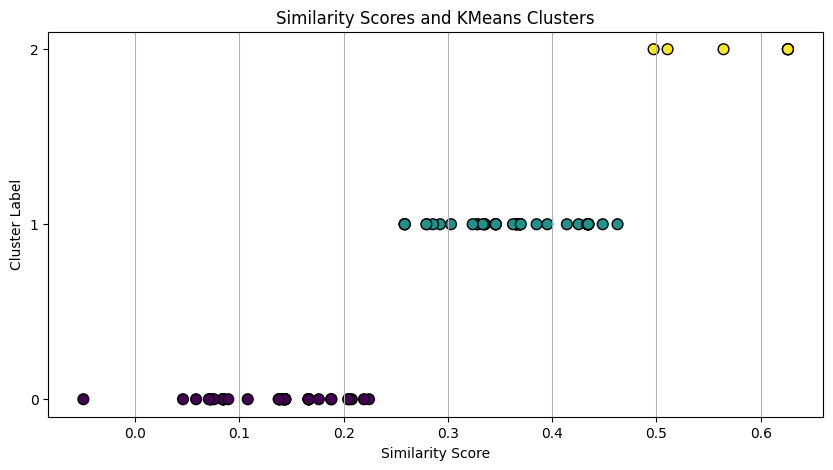

In [48]:
plt.figure(figsize=(10, 5))
plt.scatter(X.flatten(), clusters, c=clusters, cmap='viridis', s=60, edgecolor='k')
plt.xlabel('Similarity Score')
plt.ylabel('Cluster Label')
plt.title('Similarity Scores and KMeans Clusters')
plt.yticks([0, 1, 2])
plt.grid(True, axis='x')
plt.show()

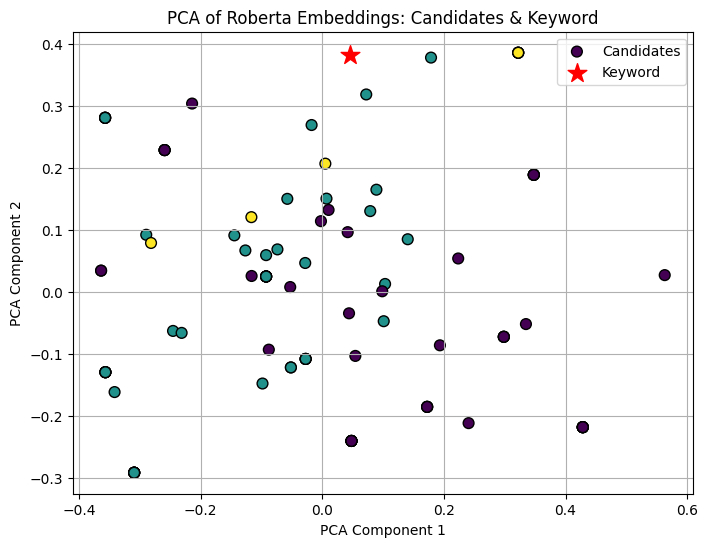

In [49]:
from sklearn.decomposition import PCA

# Prepare embeddings: keyword and all valid candidate entries
keyword_emb = roberta_keyword_emb.reshape(1, -1)
candidate_embs = np.stack(valid_candidates['roberta_embeddings'].values)
all_embs = np.vstack([keyword_emb, candidate_embs])

# Run PCA to reduce to 2D
pca = PCA(n_components=2, random_state=42)
embs_2d = pca.fit_transform(all_embs)

# Plot
plt.figure(figsize=(8, 6))
# Plot candidates, colored by cluster
scatter = plt.scatter(
    embs_2d[1:, 0], embs_2d[1:, 1],
    c=clusters, cmap='viridis', s=60, edgecolor='k', label='Candidates'
)
# Plot keyword
plt.scatter(
    embs_2d[0, 0], embs_2d[0, 1],
    c='red', marker='*', s=200, label='Keyword'
)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Roberta Embeddings: Candidates & Keyword')
plt.legend()
plt.grid(True)
plt.show()

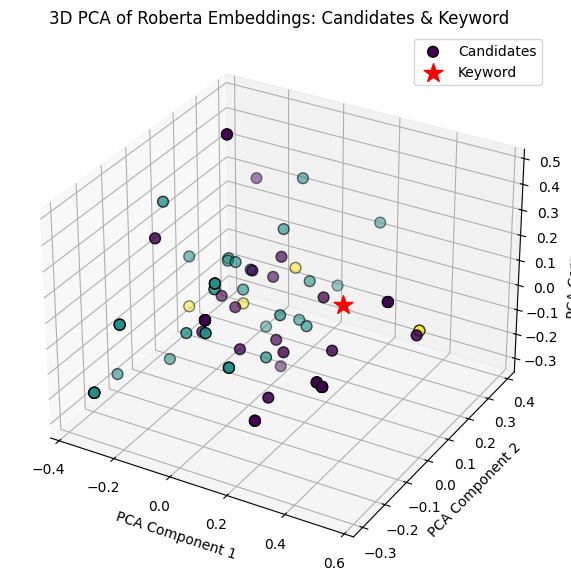

In [50]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare embeddings: keyword and all valid candidate entries
keyword_emb = roberta_keyword_emb.reshape(1, -1)
candidate_embs = np.stack(valid_candidates['roberta_embeddings'].values)
all_embs = np.vstack([keyword_emb, candidate_embs])

# Run PCA to reduce to 3D
pca_3d = PCA(n_components=3, random_state=42)
embs_3d = pca_3d.fit_transform(all_embs)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot candidates, colored by cluster
sc = ax.scatter(
    embs_3d[1:, 0], embs_3d[1:, 1], embs_3d[1:, 2],
    c=clusters, cmap='viridis', s=60, edgecolor='k', label='Candidates'
)
# Plot keyword
ax.scatter(
    embs_3d[0, 0], embs_3d[0, 1], embs_3d[0, 2],
    c='red', marker='*', s=200, label='Keyword'
)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA of Roberta Embeddings: Candidates & Keyword')
ax.legend()
plt.show()

In [52]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,job_title_avg_word_len,keyword_char_match,seniority_score,job_title_punct_penalty,similarity_cluster
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,6.933333,0.269231,0.0,0.019231,0
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,6.333333,0.438596,0.0,0.035088,0
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,9.250000,0.756757,0.0,0.000000,1
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,7.600000,0.526316,0.0,0.000000,1
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,6.714286,0.531915,0.0,0.000000,0


In [51]:
candidate_data.columns

Index(['id', 'job_title', 'location', 'connection', 'fit', 'similarity_scores',
       'roberta_embeddings', 'job_title_lemmatized', 'job_title_char_count',
       'job_title_word_count', 'job_title_avg_word_len', 'keyword_char_match',
       'seniority_score', 'job_title_punct_penalty', 'similarity_cluster'],
      dtype='object')

In [67]:
def experience_score(job_title_lemmatized):
    if pd.isnull(job_title_lemmatized):
        return 0.0
    return 1.0 if 'experience' in job_title_lemmatized.lower() else 0.0

candidate_data['experience_score'] = candidate_data['job_title_lemmatized'].apply(experience_score)

In [68]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,...,keyword_char_match,seniority_score,job_title_punct_penalty,similarity_cluster,word2vec_embeddings,sentence_transformer_embeddings,word2vec_similarity,sentence_similarity,glove_embeddings,experience_score
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,...,0.269231,0.0,0.019231,0,"[[0.016329635, -0.008877811, 0.017972514, 0.01...","[-0.07176385, 0.0022636112, -0.017858256, 0.03...",0.452996,0.535285,"[[0.29147, 0.034791, 0.12969, -0.20702, -1.155...",0.0
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,...,0.438596,0.0,0.035088,0,"[[-0.01427803, 0.0024820613, -0.014353433, -0....","[-0.012136359, 0.019054487, 0.03814819, 0.0135...",0.552295,0.253609,"[[0.27724, 0.88469, -0.26247, 0.084104, 0.4081...",0.0
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,...,0.756757,0.0,0.000000,1,"[[0.015635142, -0.019020373, -0.00041106224, 0...","[-0.031211147, 0.047989413, -0.014072429, 0.09...",0.861874,0.877541,[],0.0
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,...,0.526316,0.0,0.000000,1,"[[0.00018912792, 0.0061546396, -0.01362529, -0...","[-0.106952295, -0.020745134, -0.08798134, 0.04...",0.817421,0.606107,"[[0.27724, 0.88469, -0.26247, 0.084104, 0.4081...",0.0
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,...,0.531915,0.0,0.000000,0,"[[-0.016485356, 0.01859871, -0.00039532184, -0...","[-0.09358544, 0.024366373, -0.008675753, -0.00...",0.687182,0.304957,"[[0.27724, 0.88469, -0.26247, 0.084104, 0.4081...",0.0


In [91]:
candidate_data.drop(['country', 'city_region'], axis=1, inplace=True)

In [92]:
from openai import OpenAI

client = openai.OpenAI(api_key="sk-proj-rCY9AX7_FXZkiwZ57f9rrkLGdZQ1AZcvMLjRRCx7g2GsTcHLo8Z-" \
"jpgGxUvT28IPHJpVLsnc3aT3BlbkFJYai_rfEHVOQG_h3jlp-HUUgfBWnGqbsYRjB5-O783bSYdK-ZJIvfuGqM6ngepsg5ceXhWZb_cA")

import json

def extract_location_parts(location):
    """
    Use OpenAI LLM to extract country and city/region from a location string.
    If the country is not present, the LLM will infer it.
    """
    if pd.isnull(location) or not str(location).strip():
        return pd.Series({'country': None, 'city_region': None})

    prompt = (
        f"Given the following location string: '{location}', "
        "extract the country, city and the region separately. "
        "If the country is not explicitly mentioned, infer it based on the city/region or context. "
        "If city is not mentioned, return None for city. "
        "Return your answer as JSON with keys 'country', 'city' and 'region'."
    )

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0
        )

        content = response.choices[0].message.content
        # Try to extract JSON from the response
        start = content.find('{')
        end = content.rfind('}') + 1
        json_str = content[start:end]
        result = json.loads(json_str)
        return pd.Series({
            'country': result.get('country', None),
            'city': result.get('city', None),
            'region': result.get('region', None)
        })
    except Exception as e:
        print(f"LLM extraction failed for '{location}': {e}")
        return pd.Series({'country': None, 'city': None, 'region': None})

# Apply to candidate_data
location_features = candidate_data['location'].apply(extract_location_parts)
candidate_data = pd.concat([candidate_data, location_features], axis=1)

In [93]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,...,word2vec_embeddings,sentence_transformer_embeddings,word2vec_similarity,sentence_similarity,experience_score,Glove_embeddings,Glove_similarity,country,city,region
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,...,"[[0.016329635, -0.008877811, 0.017972514, 0.01...","[-0.07176385, 0.0022636112, -0.017858256, 0.03...",0.452996,0.535285,0.0,"[-0.4022808749999999, 0.6213888124999999, -0.1...",0.779651,United States,Houston,Texas
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,...,"[[-0.01427803, 0.0024820613, -0.014353433, -0....","[-0.012136359, 0.019054487, 0.03814819, 0.0135...",0.552295,0.253609,0.0,"[-0.4212777777777778, 0.5876444444444444, -0.4...",0.698349,Canada,None,Kanada
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,...,"[[0.015635142, -0.019020373, -0.00041106224, 0...","[-0.031211147, 0.047989413, -0.014072429, 0.09...",0.861874,0.877541,0.0,"[-0.300725, 0.3483925, -0.141115, 0.161565, 0....",0.962704,United States,Raleigh-Durham,North Carolina Area
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,...,"[[0.00018912792, 0.0061546396, -0.01362529, -0...","[-0.106952295, -0.020745134, -0.08798134, 0.04...",0.817421,0.606107,0.0,"[0.242582, 0.3057846, -0.049482000000000005, 0...",0.759374,United States,Denton,Texas
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,...,"[[-0.016485356, 0.01859871, -0.00039532184, -0...","[-0.09358544, 0.024366373, -0.008675753, -0.00...",0.687182,0.304957,0.0,"[-0.3690428571428571, 0.2708057142857143, -0.2...",0.611781,Türkiye,İzmir,None


In [94]:
def connection_score(connection):
    """
    Score connection count between 0 and 1, linearly from 0 to 500+.
    Accepts values like '85', '500+', etc.
    """
    if pd.isnull(connection):
        return 0.0
    try:
        # Handle '500+' and similar
        if isinstance(connection, str) and '500' in connection:
            return 1.0
        # Try to extract numeric value
        num = int(''.join(filter(str.isdigit, str(connection))))
        score = min(num, 500) / 500.0
        return score
    except Exception:
        return 0.0

candidate_data['connection_score'] = candidate_data['connection'].apply(connection_score)

In [95]:
candidate_data.head()

,id,job_title,location,connection,fit,similarity_scores,roberta_embeddings,job_title_lemmatized,job_title_char_count,job_title_word_count,...,sentence_transformer_embeddings,word2vec_similarity,sentence_similarity,experience_score,Glove_embeddings,Glove_similarity,country,city,region,connection_score
0,1.0,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN,0.084313,"[0.057274643, 0.04327847, -0.088642426, 0.0788...",2019 C.T. Bauer College Business Graduate ( Ma...,104,15,...,"[-0.07176385, 0.0022636112, -0.017858256, 0.03...",0.452996,0.535285,0.0,"[-0.4022808749999999, 0.6213888124999999, -0.1...",0.779651,United States,Houston,Texas,0.170
1,2.0,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN,0.138683,"[-0.028051104, 0.021172712, -0.056553528, 0.13...",native English teacher EPIK ( English Program ...,57,9,...,"[-0.012136359, 0.019054487, 0.03814819, 0.0135...",0.552295,0.253609,0.0,"[-0.4212777777777778, 0.5876444444444444, -0.4...",0.698349,Canada,None,Kanada,1.000
2,3.0,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.434607,"[-0.094496034, 0.08710561, -0.038341653, -0.24...",Aspiring Human Resources Professional,37,4,...,"[-0.031211147, 0.047989413, -0.014072429, 0.09...",0.861874,0.877541,0.0,"[-0.300725, 0.3483925, -0.141115, 0.161565, 0....",0.962704,United States,Raleigh-Durham,North Carolina Area,0.088
3,4.0,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN,0.369073,"[-0.068273716, -0.046773065, 0.008825905, 0.00...",People Development Coordinator Ryan,38,5,...,"[-0.106952295, -0.020745134, -0.08798134, 0.04...",0.817421,0.606107,0.0,"[0.242582, 0.3057846, -0.049482000000000005, 0...",0.759374,United States,Denton,Texas,1.000
4,5.0,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN,0.143914,"[-0.03519841, 0.08660441, -0.007720081, 0.1119...",Advisory Board Member Celal Bayar University,47,7,...,"[-0.09358544, 0.024366373, -0.008675753, -0.00...",0.687182,0.304957,0.0,"[-0.3690428571428571, 0.2708057142857143, -0.2...",0.611781,Türkiye,İzmir,None,1.000


In [96]:
candidate_data['id'] = candidate_data['id'].astype('Int64')

In [97]:
candidate_data.drop('fit', axis=1, inplace=True)

In [98]:
candidate_data.to_csv('extracted_features_candidate_data_ver1.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

class InitialRanker:
    def __init__(self):
        self.feature_weights = {
            'cosine_similarity': 0.4,  # Most important initially
            'keyword_density': 0.2,
            'exact_matches': 0.15,
            'keyword_position': 0.1,
            'word_count': 0.05,
            'char_count': 0.05,
            'flesch_score': 0.05
        }
        self.scaler = StandardScaler()
    
    def rank_results(self, features_df):
        # Normalize features
        normalized_features = self.scaler.fit_transform(features_df)
        
        # Calculate weighted score
        scores = np.zeros(len(features_df))
        for i, (feature, weight) in enumerate(self.feature_weights.items()):
            scores += weight * normalized_features[:, i]
        
        # Return ranked indices
        return np.argsort(scores)[::-1]

In [ ]:
class ContextualBandit:
    def __init__(self, n_features, alpha=1.0):
        self.n_features = n_features
        self.alpha = alpha
        
        # Initialize parameters for each arm (ranking position)
        self.A = [np.eye(n_features) for _ in range(10)]  # Top 10 positions
        self.b = [np.zeros(n_features) for _ in range(10)]
        self.interaction_count = 0
    
    def select_item_for_position(self, candidates, position):
        """Select best item for a specific position using LinUCB"""
        scores = []
        
        for candidate in candidates:
            features = candidate['features']
            A_inv = np.linalg.inv(self.A[position])
            theta = A_inv @ self.b[position]
            
            # Confidence bound
            confidence = self.alpha * np.sqrt(features.T @ A_inv @ features)
            score = theta.T @ features + confidence
            scores.append(score)
        
        return np.argmax(scores)
    
    def update_position(self, position, features, reward):
        """Update parameters for a specific position"""
        self.A[position] += np.outer(features, features)
        self.b[position] += reward * features
        self.interaction_count += 1

In [ ]:
class ColdStartRankingPipeline:
    def __init__(self, max_results=10):
        self.baseline_ranker = ColdStartRanker()
        self.bandit = ContextualBandit(n_features=8)  # Adjust based on features
        self.max_results = max_results
        self.exploration_rate = 0.3  # Start high, decay over time
        
    def rank_query_results(self, query_results):
        """Main ranking function"""
        # Extract features
        features = self._extract_features(query_results)
        
        # Get baseline ranking
        baseline_ranking = self.baseline_ranker.rank_results(features)
        
        # Decide exploration vs exploitation
        if self._should_explore():
            return self._explore_ranking(query_results, features)
        else:
            return self._exploit_ranking(query_results, features, baseline_ranking)
    
    def _should_explore(self):
        """Decay exploration over time"""
        decay_rate = 0.995
        current_rate = self.exploration_rate * (decay_rate ** self.bandit.interaction_count)
        return np.random.random() < current_rate
    
    def _explore_ranking(self, query_results, features):
        """Exploration: try different rankings"""
        n_results = min(len(query_results), self.max_results)
        
        # Random permutation with some bias toward similarity
        weights = features[:, 0]  # Cosine similarity column
        weights = np.exp(weights) / np.sum(np.exp(weights))  # Softmax
        
        ranking = np.random.choice(
            len(query_results), 
            size=n_results, 
            replace=False, 
            p=weights
        )
        return ranking
    
    def _exploit_ranking(self, query_results, features, baseline_ranking):
        """Exploitation: use learned preferences"""
        available_items = list(range(len(query_results)))
        final_ranking = []
        
        for position in range(min(self.max_results, len(query_results))):
            # Use bandit to select best item for this position
            candidates = [{'features': features[i], 'index': i} 
                         for i in available_items]
            
            selected_idx = self.bandit.select_item_for_position(candidates, position)
            item_index = available_items[selected_idx]
            
            final_ranking.append(item_index)
            available_items.remove(item_index)
        
        return np.array(final_ranking)

In [ ]:
class FeedbackProcessor:
    def __init__(self, pipeline):
        self.pipeline = pipeline
        self.feedback_history = []
        
    def process_user_stars(self, query_results, ranking, starred_items):
        """Process user feedback and update models"""
        features = self.pipeline._extract_features(query_results)
        
        # Calculate rewards for each position
        for position, item_idx in enumerate(ranking):
            if position >= 10:  # Only track top 10
                break
                
            # Reward calculation
            reward = self._calculate_position_reward(item_idx, starred_items, position)
            
            # Update bandit for this position
            self.pipeline.bandit.update_position(
                position, 
                features[item_idx], 
                reward
            )
        
        # Store feedback for analysis
        self.feedback_history.append({
            'query': query_results,
            'ranking': ranking,
            'starred': starred_items,
            'timestamp': time.time()
        })
        
        # Periodically update baseline weights
        if len(self.feedback_history) % 50 == 0:
            self._update_baseline_weights()
    
    def _calculate_position_reward(self, item_idx, starred_items, position):
        """Calculate reward based on position and stars"""
        if item_idx in starred_items:
            # Higher reward for starred items at top positions
            return 1.0 / (position + 1)
        else:
            # Small negative reward for non-starred items at top
            return -0.1 / (position + 1)
    
    def _update_baseline_weights(self):
        """Update baseline feature weights based on feedback"""
        if len(self.feedback_history) < 10:
            return
        
        # Analyze which features correlate with starred items
        starred_features = []
        non_starred_features = []
        
        for feedback in self.feedback_history[-100:]:  # Last 100 interactions
            features = self.pipeline._extract_features(feedback['query'])
            
            for item_idx in feedback['starred']:
                starred_features.append(features[item_idx])
            
            for i, item in enumerate(feedback['query']):
                if i not in feedback['starred']:
                    non_starred_features.append(features[i])
        
        # Simple feature importance update
        if starred_features and non_starred_features:
            starred_mean = np.mean(starred_features, axis=0)
            non_starred_mean = np.mean(non_starred_features, axis=0)
            
            # Update weights based on feature differences
            feature_importance = np.abs(starred_mean - non_starred_mean)
            feature_importance = feature_importance / np.sum(feature_importance)
            
            feature_names = list(self.pipeline.baseline_ranker.feature_weights.keys())
            for i, feature in enumerate(feature_names):
                self.pipeline.baseline_ranker.feature_weights[feature] = feature_importance[i]

In [ ]:
class RankingSystem:
    def __init__(self):
        self.pipeline = ColdStartRankingPipeline()
        self.feedback_processor = FeedbackProcessor(self.pipeline)
        self.query_count = 0
        
    def search_and_rank(self, query, job_titles):
        """Main search interface"""
        self.query_count += 1
        
        # Your existing search logic here
        query_results = self._search_candidates(query, job_titles)
        
        # Rank results
        ranking = self.pipeline.rank_query_results(query_results)
        
        # Return ranked results
        return [query_results[i] for i in ranking]
    
    def process_user_feedback(self, query_results, ranking, starred_items):
        """Handle user stars"""
        self.feedback_processor.process_user_stars(
            query_results, ranking, starred_items
        )
        
    def get_system_stats(self):
        """Return system performance metrics"""
        return {
            'total_queries': self.query_count,
            'interactions': self.pipeline.bandit.interaction_count,
            'current_exploration_rate': self.pipeline.exploration_rate * 
                (0.995 ** self.pipeline.bandit.interaction_count),
            'feedback_count': len(self.feedback_processor.feedback_history)
        }

In [ ]:
# Initialize system
ranking_system = RankingSystem()

# Search and rank
results = ranking_system.search_and_rank("python developer", job_titles)

# User stars some results
starred_indices = [0, 2]  # User starred 1st and 3rd results
ranking_system.process_user_feedback(results, list(range(len(results))), starred_indices)

# System learns and improves over time